In [1]:
%load_ext autoreload
%autoreload 2

In [89]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Resize, Compose
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
sys.path.append('../')
import dataset

In [83]:
pascal_voc_train = torchvision.datasets.VOCDetection(
    root="../data",
    year="2007",
    image_set="train",
    download=False
)

In [84]:
voc_train = dataset.PascalVOC(pascal_voc=pascal_voc_train)

TRANSFORMING PASCAL VOC


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

156.0 351.0 97.0 270.0
139.776 314.496 130.49849849849852 363.2432432432433
185.0 279.0 62.0 199.0
172.66666666666666 260.4 76.3076923076923 244.92307692307693
90.0 403.0 78.0 336.0
84.0 376.1333333333333 96.0 413.53846153846155
9.0 245.0 230.0 500.0
12.071856287425149 328.62275449101793 206.08 448.0
230.0 334.0 220.0 500.0
308.50299401197606 448.0 197.12 448.0
2.0 90.0 178.0 500.0
2.682634730538922 120.71856287425149 159.488 448.0
2.0 117.0 1.0 369.0
2.682634730538922 156.93413173652692 0.896 330.624
3.0 243.0 2.0 462.0
4.023952095808383 325.94011976047904 1.792 413.952
225.0 334.0 1.0 486.0
301.7964071856287 448.0 0.896 435.456
90.0 337.0 125.0 212.0
80.64 301.952 168.1681681681682 285.21321321321324
104.0 375.0 78.0 183.0
93.184 336.0 124.355871886121 291.7580071174377
133.0 197.0 88.0 123.0
119.168 176.512 140.29893238434164 196.09964412811388
195.0 213.0 180.0 229.0
174.72 190.848 286.97508896797154 365.0960854092527
26.0 44.0 189.0 238.0
23.296 39.424 301.3238434163701 379.444839

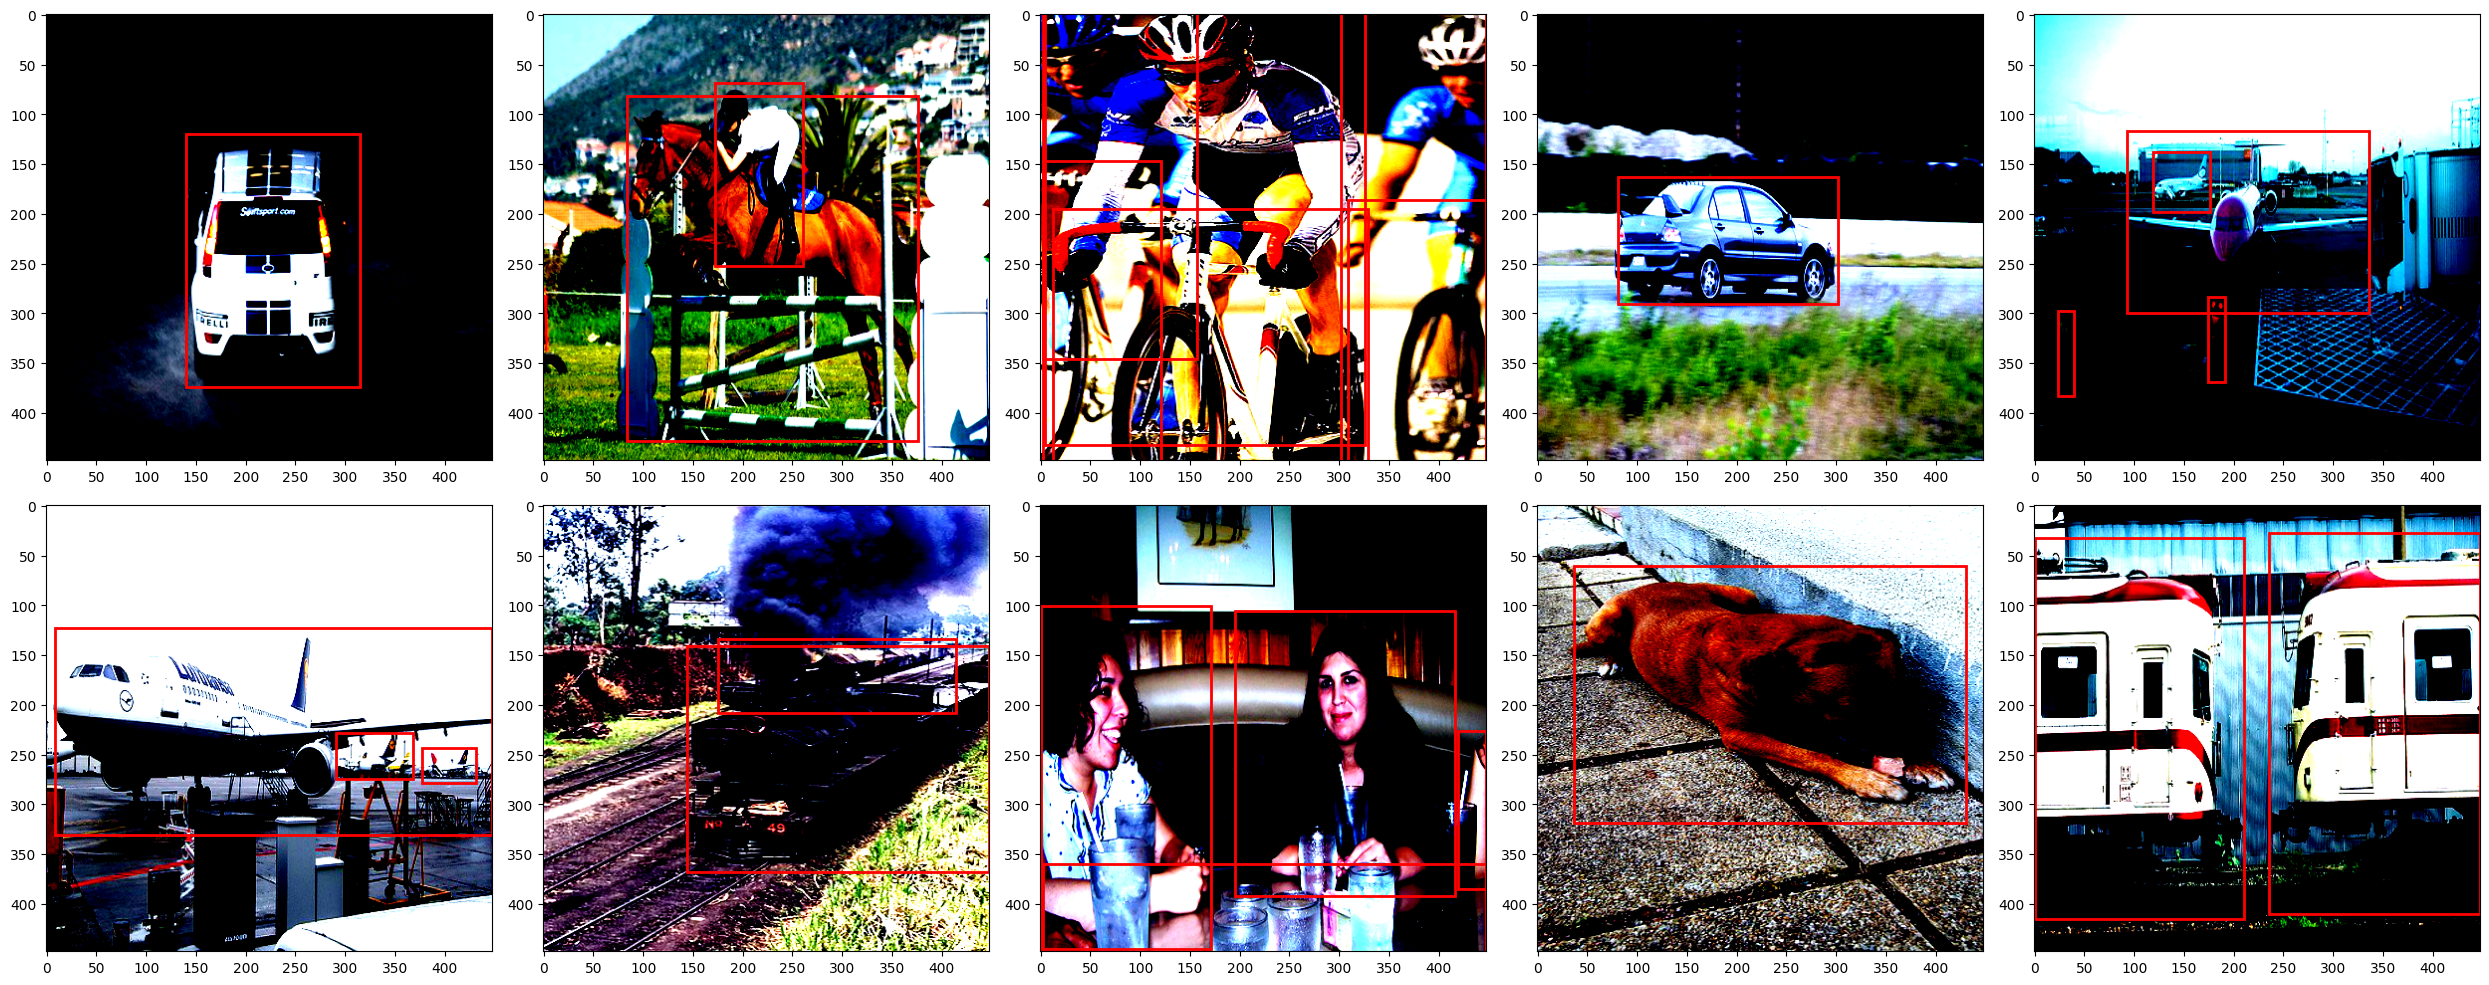

In [86]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))

for i in range(10):
    img, target = voc_train[i]
    img = img.permute((1, 2, 0))
    
    x = i // 5
    y = i % 5
    
    ax = axes[x][y]
    ax.imshow(img)
    
    for _y in range(len(target)):
        for _x in range(len(target[_x])):
            t = target[_y][_x]
            confidence = t[0]
            if confidence.item() == 1:
                box = t[1:5].numpy()
                w, h = box[2] * 448, box[3] * 488
                x_center = _x * 64 + box[0] * 64
                y_center = _y * 64 + box[1] * 64
                
                x = x_center - (w / 2)
                y = y_center - (h / 2)
                
                bounding = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(bounding)
                
fig.tight_layout()

240.0 432.0 56.0 332.0
215.04 387.072 75.56626506024097 447.99999999999994


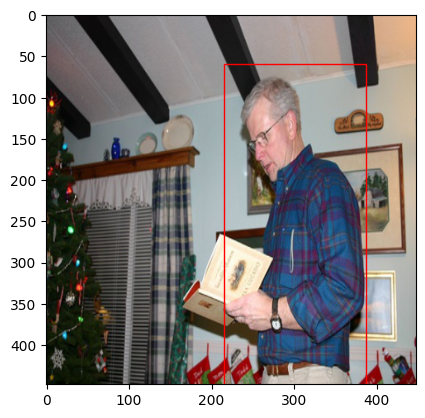

In [98]:
i = 101
img, target = voc_train[i]

transform = Compose([ToTensor(), Resize((448, 448))])
img = pascal_voc_train[i][0]
img = transform(img)
img = img.permute((1, 2, 0))

fig, ax = plt.subplots()

ax.imshow(img)

for _y in range(len(target)):
        for _x in range(len(target[_x])):
            t = target[_y][_x]
            confidence = t[0]
            if confidence.item() == 1:
                box = t[1:5].numpy()
                w, h = box[2] * 448, box[3] * 488
                x_center = _x * 64 + box[0] * 64
                y_center = _y * 64 + box[1] * 64
                
                x = x_center - (w / 2)
                y = y_center - (h / 2)
                
                bounding = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(bounding)